Introduction

This report details the analysis of the GP prescribing dataset curated by NHS Digital and publically available for download.

The dataset details all prescriptions made by GP practices in England.  The dataset pertains to the month of April 2018.  

Information available includes prescription type, number and associated costs, accompanied by demographic information for the practices including location information and number of registered patients.

The comprehensive nature of this dataset allows analysis of prescribing patterns across a generalisable population for England and as such has been previously utilised in observational studies, such as a recent study by Walker et al[1].  This study utilised this dataset, prepared via OpenPrescribing.net project to perform a cross-sectional analysis of low priority treatment prescribing in English primary care.

[1] Walker AJ, Curtis HJ, Bacon S et al.  2018.  Trends and variation in prescribing of low-priority treatments identified by NHS England: a cross-sectional study and interactive data tool in English primary care.  Journal of the Royal Society of Medicine https://doi.org/10.1177/0141076818769408

Aims

NHS England is routinely tasked by the Department of Health to make efficiency savings in the context of expanding demand for services.  Prescribing of medications and treatments in primary care constitutes a major source of healthcare expenditure.  The NHS attempts to standardise treatment costs across primary care but there remains regional variation due to differences in population demographic.

The first step in identifying policies to increase efficiencies across this system is the analysis and review of GP prescribing.  This is made possible by the detailed dataset curated by NHS Digital and used in this report.

Import required libraries:

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pandasql

Monthly prescribing data is provided in CSV format.  Information pertaining to this analysis is contained within three such files:

    1.  GP Demographic data 
            - gp_demographics
    2.  Individual practice prescribing data 
            - gp_prescribing
    3.  Detailed practice information 
            - gp_practices
            
The first step is to read in the required files.

In [332]:
# GP demographic data:

path = 'https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv'

gp_demographics = pd.read_csv(path, skiprows = 1)

col_names = ["Publication", "extract_date", "type", "CCG", "ONS_CCG", "code", "postcode", "sex", "age", "num_pts"]

gp_demographics.columns = col_names

gp_demographics.head()

,Publication,extract_date,type,CCG,ONS_CCG,code,postcode,sex,age,num_pts
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83034,DL3 7JR,ALL,ALL,10128


In [333]:
# Practice prescribing data:

path_2 = 'https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV'
# remove hidden white space in the column headers by re-reading in the csv with personalised cols:

cols = ['SHA', 'PCT', 'practice_code', 'bnf_code', 'bnf_name', 'items', 'net_cost', 'act_cost', 'quantity', 'period']

gp_prescribing = pd.read_csv(path_2, names=cols,index_col=False, low_memory=False)

gp_prescribing = gp_prescribing.drop(gp_prescribing.index[0])

gp_prescribing.head()

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period
1,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,0000006,00000001.56,00000002.12,0000063,201804
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,0000004,00000000.87,00000001.15,0000073,201804
3,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,0000002,00000000.46,00000000.56,0000035,201804
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,0000001,00000002.60,00000002.52,0000014,201804
5,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,0000001,00000001.53,00000001.53,0000014,201804


In [334]:
# reconfigure data types:

gp_prescribing = gp_prescribing.astype({'act_cost': float})
gp_prescribing = gp_prescribing.astype({'items': int})


In [336]:
# practice information:

path_3 = 'https://files.digital.nhs.uk/20/09E30B/T201804ADDR%20BNFT.CSV'
gp_practices = pd.read_csv(path_3)

col = ['timePeriod', 'practice_code', 'practice_name', 'practice_organisation', 'street', 'city', 'area', 'postcode']

gp_practices.columns = col

gp_practices.head()

,timePeriod,practice_code,practice_name,practice_organisation,street,city,area,postcode
0,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
2,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
3,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT
4,201804,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW


In [337]:
# inspect data:

gp_practices.shape

(9577, 8)

In [338]:
gp_demographics.shape

(7240, 10)

In [339]:
gp_prescribing.shape

(9748354, 10)

Having read in and inspected the datasets, the step of analysing prescribing patterns involves the subset of GP practices within the London area.  In order to identify London practices, there are three potential indicators which might be used, contained within the GP demographic table:

1.  Area listed as 'London'
2.  City listed as 'London'
3.  Postcode is a London postcode

In order to capture the correct number of London-based practices a combination of these three definitions will be used.

In [366]:
# Label each practice (row) where London appears under the 'area' column:

gp_practices['lond_area'] = np.where(gp_practices['area'].str.match("LONDON"), 1, 0)

# Label each practice where London appears under the 'city' column:

gp_practices['lond_city'] = np.where(gp_practices['city'].str.match("LONDON"), 1, 0)


In order to match correct postcode, a list of defined London postcodes was used, produced by the Office of National Statistics and available via the documented URL: 

In [367]:
# ONS list of London postcodes - reference web address:

path_4 = 'https://data.london.gov.uk/download/postcode-directory-for-london/fd269535-973a-418f-8847-da405687e2e2/London_postcode-ONS-postcode-Directory-May15.csv'
col_names = ["postcode", "data1", "data2"]

pc = pd.read_csv(path_4 + 'nov18y56.csv', names=col_names)

pc.head()

C:\Users\mwils\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,8,9,10,11,16,25,27,38,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,postcode,data1,data2
pcd,pcd2,pcds,dointr,doterm,oscty,oslaua,osward,usertype,oseast1m,osnrth1m,osgrdind,oshlthau,hro,ctry,gor,streg,pcon,eer,teclec,ttwa,pct,nuts,psed,cened,edind,oshaprev,lea,oldha,wardc91,wardo91,ward98,statsward,oa01,casward,park,lsoa01,msoa01,ur01ind,oac01,oldpct,oa11,lsoa11,msoa11,parish,wz11,ccg,bua11,buasd11,ru11ind,oac11,lat,long
BR1 1AA,BR1 1AA,BR1 1AA,199002,200812,E99999999,E09000006,E05000109,1,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
BR1 1AB,BR1 1AB,BR1 1AB,201203,,E99999999,E09000006,E05000109,0,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
BR1 1AD,BR1 1AD,BR1 1AD,201409,,E99999999,E09000006,E05000109,1,540383,168708,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFGA17,AUGA17,1,Q07,30,QEY,02AUGA,01AFGA,00AFGA,00AFGG,E00003264,00AFG,E99999999,E01000675,E02000144,5,2B2,5A7,E00003264,E01000675,E02000144,E43000196,E33029199,E38000023,E34004707,E35000434,,4C3,51.40004,0.016671
BR1 1AE,BR1 1AE,BR1 1AE,200808,,E99999999,E09000006,E05000109,0,540194,169201,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003266,00AFG,E99999999,E01000677,E02000144,5,2B2,5A7,E00003266,E01000677,E02000144,E43000196,E33029200,E38000023,E34004707,E35000434,,2D1,51.404517,0.014151


In [368]:
pc.shape

(312431, 3)

In [369]:
# Create new column where if postcode is present in ONS list (i.e. is London-based) then == True:


gp_practices['lond_postcode'] = gp_practices['postcode'].isin(pc['postcode'])


In [370]:
# Extract London-based practices if London appears in city or area or has London postcode and generate new variable london_practices:


london_practices = gp_practices[(gp_practices['lond_area'] == 1) | (gp_practices['lond_city'] == 1) | (gp_practices['lond_postcode'] == True)]


In [371]:
# inspect:

london_practices.head()

,timePeriod,practice_code,practice_name,practice_organisation,street,city,area,postcode,lond_postcode,lond_area,lond_city
1850,201804,E82113,COLNEY MEDICAL CENTRE,COLNEY MEDICAL CENTRE,45 KINGS ROAD,LONDON COLNEY,HERTFORDSHIRE,AL2 1ES,False,0,1
1872,201804,E83003,OAKLEIGH ROAD HEALTH CENTRE,OAKLEIGH ROAD HEALTH CTR,280 OAKLEIGH ROAD NORTH,WHETSTONE,LONDON,N20 0DH,False,1,0
1873,201804,E83005,LICHFIELD GROVE SURGERY,64 LICHFIELD GROVE,,FINCHLEY,LONDON,N3 2JP,False,1,0
1874,201804,E83006,GREENFIELD MEDICAL CENTRE,GREENFIELD MEDICAL CENTRE,143-145 CRICKLEWOOD LANE,CRICKLEWOOD,LONDON,NW2 1HS,False,1,0
1875,201804,E83007,SQUIRES LANE MEDICAL PRACTICE,2 SQUIRES LANE,,FINCHLEY,LONDON,N3 2AU,False,1,0


In [372]:
london_practices.shape

(932, 11)

This has generated 932 practices.  On inspection of the entire list, all appear to be based in London except the first row, which is based in Hertfordshire, therefore this row was dropped.

In [373]:
# drop the Hertfordshire based practice:

london_practices = london_practices.drop([1850])

In [374]:
london_practices.shape

(931, 11)

931 practices based in London have been identified from this dataset.  This number can be cross validated by comparing with the NHS Digital interactive dashboard.  In doing so this appears to have underestimated the number of practices in London.  It is likely this has occurred due to differences in the definition of London boundaries due to postcode.  NHS Digital considers the greater London area, including areas without a London postcode, for example, areas of Essex with RM postcodes are included as London. 

931 practices will be used for further analysis as a representative sample for London.

In [375]:
# for ease of further analysis, obtain the demographic data for the identified London-based practices:


gp_demographics = gp_demographics.rename(columns = {'code': 'practice_code'})


london_demo = pd.merge(london_practices, gp_demographics, how='inner', on='practice_code')

In [376]:
london_demo.shape

(747, 20)

In [377]:
london_demo.head()

,timePeriod,practice_code,practice_name,practice_organisation,street,city,area,postcode_x,lond_postcode,lond_area,lond_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
0,201804,E83003,OAKLEIGH ROAD HEALTH CENTRE,OAKLEIGH ROAD HEALTH CTR,280 OAKLEIGH ROAD NORTH,WHETSTONE,LONDON,N20 0DH,False,1,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1,201804,E83005,LICHFIELD GROVE SURGERY,64 LICHFIELD GROVE,,FINCHLEY,LONDON,N3 2JP,False,1,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N3 2JP,ALL,ALL,6224
2,201804,E83006,GREENFIELD MEDICAL CENTRE,GREENFIELD MEDICAL CENTRE,143-145 CRICKLEWOOD LANE,CRICKLEWOOD,LONDON,NW2 1HS,False,1,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,NW2 1HS,ALL,ALL,6885
3,201804,E83007,SQUIRES LANE MEDICAL PRACTICE,2 SQUIRES LANE,,FINCHLEY,LONDON,N3 2AU,False,1,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N3 2AU,ALL,ALL,5706
4,201804,E83008,HEATHFIELDE MEDICAL CENTRE,HEATHFIELDE MEDICAL CTR,LYTTLETON ROAD FINCHLEY,BARNET,LONDON,N2 0EQ,False,1,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N2 0EQ,ALL,ALL,7900


Once the tables have been merged, we can see that full demographic information is available for 747 London practices.  

From this, the total number of patients in the London dataset can be obtained and compared with the total number of patients in the original dataset:

In [378]:
total_pt_db = gp_demographics["num_pts"].sum()
print(total_pt_db)

total_pt_lond = london_demo["num_pts"].sum()
print(total_pt_lond)

59027769
5841956


Therefore, from 59 million patient records contained within the GP demographic table, we have extracted data for 5,841,956 patients belonging to GP practices located in the London area. 

Total registered patients for each of the London based practices is listed under the column 'num_pts'.

The total number of prescriptions issued during April 2018 for the London based practices identified may be derived by adding the 'Items' column found in the GP prescribing dataset:

In [379]:
# trial for a single practice in the main GP prescribing dataset:


prac1 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'Y05294']
prac1 = prac1.astype({"items": int})

total = prac1['items'].sum()
print(total)


343


In [381]:
# expand to all the London practices by merging the two datasets:

lond_prac_presc = pd.merge(gp_prescribing, london_demo, how='inner', on='practice_code')

# so this contains all the prescription data for the London based practices only.

In [382]:
# obtain the total prescriptions issued by each individual practice:


len(lond_prac_presc['practice_code'].unique())

lond_prac_presc = lond_prac_presc.astype({"items": int})

total_items = lond_prac_presc.groupby(['practice_code'], as_index = False).sum()

total_items.head()

,practice_code,items,act_cost,timePeriod,lond_postcode,lond_area,lond_city,num_pts
0,E83003,11740,89607.38,291404976,False,1444,0,12867484
1,E83005,6724,47240.62,230258364,False,1141,0,7101584
2,E83006,6327,54746.99,246604488,False,1222,0,8413470
3,E83007,6181,53459.56,208463532,False,1033,0,5894298
4,E83008,8909,71808.73,263556024,False,1306,0,10317400


The above table ('total_items') shows the total number of items prescribed by each London based practice (under column 'items'.

This column can then be added to the demographic table:

In [383]:
# add the total items to the demographic information table for London practices:

london_demo = pd.merge(total_items, london_demo, how='inner', on='practice_code')
london_demo.head()

,practice_code,items,act_cost,timePeriod_x,lond_postcode_x,lond_area_x,lond_city_x,num_pts_x,timePeriod_y,practice_name,...,lond_city_y,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts_y
0,E83003,11740,89607.38,291404976,False,1444,0,12867484,201804,OAKLEIGH ROAD HEALTH CENTRE,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1,E83005,6724,47240.62,230258364,False,1141,0,7101584,201804,LICHFIELD GROVE SURGERY,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N3 2JP,ALL,ALL,6224
2,E83006,6327,54746.99,246604488,False,1222,0,8413470,201804,GREENFIELD MEDICAL CENTRE,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,NW2 1HS,ALL,ALL,6885
3,E83007,6181,53459.56,208463532,False,1033,0,5894298,201804,SQUIRES LANE MEDICAL PRACTICE,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N3 2AU,ALL,ALL,5706
4,E83008,8909,71808.73,263556024,False,1306,0,10317400,201804,HEATHFIELDE MEDICAL CENTRE,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N2 0EQ,ALL,ALL,7900


In [384]:
# cross check that these numbers look correct by testing individual practices:


prac1 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'E83003']
prac1 = prac1.astype({"items": int})
total = prac1['items'].sum()
print(total)

prac2 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'E83005']
prac2 = prac2.astype({"items": int})
total = prac2['items'].sum()
print(total)

11740
6724


In [385]:
# in summary:

df_pres = pd.concat([london_demo['practice_code'], london_demo['num_pts_y'], london_demo['items']], axis=1)

df_pres = df_pres.rename(columns = {'practice_code': 'practice_code', 'num_pts_y': 'total_patients', 'items': 'total_prescriptions'})
df_pres.head()

,practice_code,total_patients,total_prescriptions
0,E83003,8911,11740
1,E83005,6224,6724
2,E83006,6885,6327
3,E83007,5706,6181
4,E83008,7900,8909


The next step is to define the total cost of prescriptions for each practice in London.  

As described in the supporting documentation provided by NHS Digital for the GP prescribing dataset, the column labelled 'Actual Cost' refers to the cost of the individual prescription item to the GP practice, once discounts and subsidies have been accounted for (explaining the difference from 'Net Cost').  However, there is no information provided as to whether calculating the total cost for a practice should account for the number of items of the medication prescribed (i.e. actual cost * number of items).  In producing this analysis, two approaches to calculating overall cost were used, summing the actual cost per prescription type and accounting for the number of items of the medication prescribed.  The two calculations yielded different outputs by an order of magnitude.  The second method of calculating total cost prescribed yielded very large numbers even at the individual practice level, not consistent with what we roughly know prescribing costs to be per month.  Cross-checking an individual practice total prescribing costs with data available at www.openprescribing.net showed that the first method of summing actual cost was much closer to likely reality and it is the results of this method which are presented below.  Therefore this analysis assumes 'actual cost' per type of medication is calculated independently of the number of items prescribed.  Interestingly, when individual medications were compared between different practices, both the net cost and actual cost per individual item were different.  The NHS operates a standardised cost model for medications but it still appears there is some geographical variation. 

In [386]:
lond_prac_presc.head()

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,lond_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
0,Q61,07L,Y04786,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,1,00000004.33,4.03,0000300,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,IG3 8YB,ALL,ALL,443
1,Q61,07L,Y04786,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,00000013.31,12.48,0001300,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,IG3 8YB,ALL,ALL,443
2,Q61,07L,Y04786,0101021B0BEAQAP,Gaviscon Advance_Tab Chble Mint(Reckitt),1,00000003.07,2.86,0000060,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,IG3 8YB,ALL,ALL,443
3,Q61,07L,Y04786,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,8,00000040.96,38.09,0004000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,IG3 8YB,ALL,ALL,443
4,Q61,07L,Y04786,0101021B0BIABAH,Peptac_Liq (Peppermint) S/F,3,00000005.85,5.46,0001500,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,IG3 8YB,ALL,ALL,443


In [387]:
# next calculate the sum of the 'act_cost' column per practice:

total_act_cost = lond_prac_presc.groupby(['practice_code'], as_index = False)

total_practice_cost = total_act_cost['act_cost'].sum()

total_practice_cost.head()

,practice_code,act_cost
0,E83003,89607.38
1,E83005,47240.62
2,E83006,54746.99
3,E83007,53459.56
4,E83008,71808.73


In [388]:
# therefore the total prescription cost during April for London practices:

total_practice_cost['act_cost'].sum()

42818380.38

Therefore the approximate total monthly prescription costs for London practices in April is £42,818,380.38.

In [389]:
# for use in later analysis, apply this to the whole gp_prescribing dataset:

total_act_cost = gp_prescribing.groupby(['practice_code'], as_index = False)

total_practice_cost = total_act_cost['act_cost'].sum()

total_practice_cost.head()

,practice_code,act_cost
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


In [391]:
total_practice_cost['act_cost'].sum()

643187390.2

Therefore the approximate total monthly prescription costs for GP practices in England for April is £643,187,390.20.  So London practices account for 6.7% of total monthly spending for primary care in NHS England for April 2018.

In [392]:
# cross-check by examining an individual practice:

prac1 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'A81001']

prac1['act_cost'].sum()

52194.630000000005

In [393]:
# add the 'total_act_cost' column to the summary table:

df_pres = pd.concat([london_demo['practice_code'], london_demo['num_pts_y'], london_demo['items'], total_practice_cost['act_cost']], axis=1)

df_pres = df_pres.rename(columns = {'practice_code': 'practice_code', 'num_pts_y': 'total_patients', 'items': 'total_prescriptions', 'act_cost': 'total_cost'})

df_pres.head()

,practice_code,total_patients,total_prescriptions,total_cost
0,E83003,8911.0,11740.0,52194.63
1,E83005,6224.0,6724.0,268607.26
2,E83006,6885.0,6327.0,139115.40
3,E83007,5706.0,6181.0,102914.06
4,E83008,7900.0,8909.0,183226.79


Returning to the subset of London based practices, the top 10 most prescribed drugs can be ascertained:

In [394]:
lond_prac_presc = lond_prac_presc.astype({'quantity': int})
lond_prac_presc.shape

(789546, 29)

In [395]:
# As before, trial for a single practice:

prac1 = lond_prac_presc.loc[lond_prac_presc['practice_code'] == 'E83003']

prac1.sort_values(by='quantity', axis=0, ascending=False).head(n=10)

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,lond_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
1941,Q61,07M,E83003,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),40,00000430.08,399.35,76800,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1938,Q61,07M,E83003,090402000BBLKA0,PaediaSure Plus_Liq (3 Flav),2,00000665.85,617.53,39300,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1942,Q61,07M,E83003,090402000BBRZA0,Ensure TwoCal_Liq (4 Flav),5,00000372.96,345.94,33600,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1946,Q61,07M,E83003,090402000BBVWA0,Aymes Complete_Liq (4 Flav),7,00000182.04,168.92,32800,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
2371,Q61,07M,E83003,21220000242,Epimax Crm 500g,46,00000114.54,106.80,23000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
2148,Q61,07M,E83003,130201000BBICBW,Dermol 500_Lot,36,00000253.68,235.72,21000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1943,Q61,07M,E83003,090402000BBSNA0,Osmolite 1.5kcal_Liq,1,00000174.90,162.21,15000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1939,Q61,07M,E83003,090402000BBNTA0,Ensure Plus Juce_Liq Feed (6 Flav),8,00000133.96,124.33,14960,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1505,Q61,07M,E83003,0407010H0AAAMAM,Paracet_Tab 500mg,109,00000132.51,126.42,13662,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911
1081,Q61,07M,E83003,0106040G0AAAAAA,Lactulose_Soln 3.1g-3.7g/5ml,27,00000063.09,59.46,13600,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,N20 0DH,ALL,ALL,8911


Apply this to the whole London dataset to identify the top 10 prescriptions for practices in London:

In [396]:
lond_prac_presc.sort_values(by='quantity', axis=0, ascending=False).head(n=10)

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,lond_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
742531,Q63,08X,H85001,090402000BBTXA0,Nutrison_800 Complete M/Fibre Liq,71,00010829.00,10043.60,980000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08X,E38000193,SW18 4DD,ALL,ALL,17711
742516,Q63,08X,H85001,090402000BBPGA0,Nutrison_1000 Complete M/Fibre Liq,33,00005414.64,5021.90,462000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08X,E38000193,SW18 4DD,ALL,ALL,17711
696165,Q63,08Q,G85034,090402000BBAJA0,Fortisip Bottle_Liq (8 Flav),92,00002432.64,2257.17,434400,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08Q,E38000171,SE1 6JP,ALL,ALL,72227
168240,Q61,08D,F85067,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),31,00001752.80,1625.91,313000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08D,E38000072,N4 3PZ,ALL,ALL,4545
224187,Q61,08M,F84004,090402000BBRMA0,Fresubin 2kcal_Drink (6 Flav),33,00002982.00,2765.90,284000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08M,E38000113,E6 2RA,ALL,ALL,13235
97564,Q61,07T,F84096,090402000BBRMA0,Fresubin 2kcal_Drink (6 Flav),44,00002763.60,2563.47,263200,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07T,E38000035,N1 5HZ,ALL,ALL,13623
49753,Q61,07R,F83017,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),94,00001314.88,1220.56,234800,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07R,E38000027,NW3 2QU,ALL,ALL,15837
742511,Q63,08X,H85001,090402000BBLMA0,Nutrison Pack_Energy M/Fibre,17,00002947.84,2734.01,231000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08X,E38000193,SW18 4DD,ALL,ALL,17711
533894,Q62,09A,E87740,0410030C0AAAAAA,Methadone HCl_Mix 1mg/1ml,332,00001447.54,1403.32,225978,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,SW1P 2BG,ALL,ALL,2165
742514,Q63,08X,H85001,090402000BBNGA0,Nutrison Pack_1200 Complete M/Fibre Liq,16,00002777.60,2576.12,224000,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08X,E38000193,SW18 4DD,ALL,ALL,17711


This suggests the top 10 most prescribed medications in London are in the main nutritional supplements, including Nutrison, Fresubin, Ensure and Fortisip drinks.  This is likely a combination of elderly patients and those with chronic disease accessing GP services in London, who require nutritional supplementation.  It may also give an overall picture of the health of the city compared to other places, possibly correlating with deprivation scores for example.  If there is a statistically significant difference between supplement use in London and other geographical areas, it could indicate a potential target for health campaigns focused on healthy eating for example. 

The presence of Methadone in the top 10 most prescribed drugs for London GP practices indicates the high proportion of opiate dependent patients - again a possible correlate with index of deprivation. 

In [397]:
# examine the top 10 least prescribed medications:

lond_prac_presc.sort_values(by='quantity', axis=0, ascending=True).head(n=10)

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,lond_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
175635,Q61,08D,F85669,090401000BBJGA0,Calogen_Emuls (Sbery),1,00002305.00,2137.65,0,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,08D,E38000072,N15 3PB,ALL,ALL,13947
553415,Q63,07V,H83611,0801030P0AAFIFI,Methotrexate_Inj 7.5mg/0.3ml Pfs,1,00000013.37,12.41,0,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07V,E38000040,SE25 5QA,ALL,ALL,3595
420632,Q62,07W,E85120,0402020G0AAACAC,Flupentixol Decan_Inj 20mg/ml 2ml Amp,1,00000002.54,2.47,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,07W,E38000048,W13 8ER,ALL,ALL,8310
236220,Q61,08M,F84053,0301020I0AAANAN,Ipratrop Brom_Inha 20mcg (200 D) CFF,1,00000005.56,5.17,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08M,E38000113,E13 8PS,ALL,ALL,7883
573720,Q63,08A,G83044,0301020T0BBAAAA,Incruse Ellipta_Inh 55mcg (30D),1,00000027.50,25.52,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08A,E38000066,SE7 8TX,ALL,ALL,11251
356108,Q61,08W,F86650,21300000134,Optive Fusion Sod Hyaluronate Eye Dps 10,1,00000007.49,6.96,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08W,E38000192,E11 4JT,ALL,ALL,7766
356107,Q61,08W,F86650,21300000124,Carmize 0.5% Carmellose Eye Dps 10ml,1,00000007.49,6.96,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08W,E38000192,E11 4JT,ALL,ALL,7766
356106,Q61,08W,F86650,21300000123,Alissa Carmellose 0.5% Eye Dps 10ml,1,00000007.49,6.96,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08W,E38000192,E11 4JT,ALL,ALL,7766
356105,Q61,08W,F86650,21300000112,Hylo-Care Sod Hyaluronate Eye Dps P/F 10,1,00000010.30,9.56,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08W,E38000192,E11 4JT,ALL,ALL,7766
236221,Q61,08M,F84053,0301020I0BBAJAN,Atrovent_Inha 20mcg (200 D) CFF,1,00000005.56,5.17,1,201804,...,0,GP_PRAC_PAT_LIST,01APR2018,GP,08M,E38000113,E13 8PS,ALL,ALL,7883


The ten least prescribed medications are fairly unexciting, including elasticated bandages and ear drops.  This may result from changes to prescription costs encouraging people to purchase these items cheaper at chemists.  

Interestingly there are several inhalers used for the prevention of exacerbations of asthma or chronic obstructive pulmonary disease.  The fact that few of these are prescribed almost certainly does not suggest a low prevalence of asthma in one of the most polluted cities in the world, however may be due to changing recommendations from professional societies such as the British Thoracic Society on use of these medications in the treatment of asthma.  They are also relatively expensive single items and it may be that there are cheaper alternatives available which GPs are using preferentially.

The same analysis can now be conducted for Cambridge.  With a smaller population than London and a different population demographic (possibly on average older, depending on the weighting of the student population).

In [398]:
# Define the Cambridge city based practices:

gp_practices['cam_city'] = np.where(gp_practices['city'].str.match("CAMBRIDGE"), 1, 0)

cam_practices = gp_practices[(gp_practices['cam_city'] == 1)]

In [399]:
# inspect:

cam_practices.head()

,timePeriod,practice_code,practice_name,practice_organisation,street,city,area,postcode,lond_postcode,lond_area,lond_city,cam_city
1454,201804,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,False,0,0,1
1455,201804,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB,False,0,0,1
1456,201804,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB1 2PY,False,0,0,1
1458,201804,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS,False,0,0,1
1461,201804,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,CAMBRIDGESHIRE,CB22 5FY,False,0,0,1


In [400]:
cam_practices.shape

(35, 12)

In [401]:
# extract the data for these 35 practices:

cam_demo = pd.merge(cam_practices, gp_demographics, how='inner', on='practice_code')

In [402]:
# total patients registered in Cambridge:

total_pt_cam = cam_demo["num_pts"].sum()
print(total_pt_cam)

300885


This indicates that the 35 practices identified for the Cambridge area cover a population of 300,885 patients.  Whilst it may be expected that Cambridge would have less GP practices than London, 35 is on the low side for the number of patients indicating there may be limitations with the methods used to identify these practices which should be considered when interpreting the results. 

In [404]:
# Total number of prescriptions:

cam_prescribe = gp_prescribing['practice_code'].isin(cam_demo['practice_code'])

cam_prac_presc = pd.merge(gp_prescribing, cam_demo, how='inner', on='practice_code')

cam_demo.shape
gp_prescribing.shape

cam_prac_presc.shape

cam_prac_presc.head()

cam_prac_presc.dtypes
len(cam_prac_presc['practice_code'].unique())

cam_prac_presc = cam_prac_presc.astype({"items": int})

total_items = cam_prac_presc.groupby(['practice_code'], as_index = False).sum()

total_items.head()


,practice_code,items,act_cost,timePeriod,lond_postcode,lond_area,lond_city,cam_city,num_pts
0,D81001,6679,65873.09,245999076,False,0,0,1219,14697483
1,D81002,13885,90156.76,312594396,False,0,0,1549,26238511
2,D81003,11572,71266.77,269206536,False,0,0,1334,13242618
3,D81005,6918,63413.35,244990056,False,0,0,1214,18138374
4,D81009,11378,84364.61,304925844,False,0,0,1511,13706281


When the identified practices in Cambridge are merged with prescribing data, complete information is available for 30 practices.  

In [405]:
# calculate total prescriptions issued per GP practice for Cambridge:

total_items = cam_prac_presc.groupby(['practice_code'], as_index = False).sum()

total_items.head()

,practice_code,items,act_cost,timePeriod,lond_postcode,lond_area,lond_city,cam_city,num_pts
0,D81001,6679,65873.09,245999076,False,0,0,1219,14697483
1,D81002,13885,90156.76,312594396,False,0,0,1549,26238511
2,D81003,11572,71266.77,269206536,False,0,0,1334,13242618
3,D81005,6918,63413.35,244990056,False,0,0,1214,18138374
4,D81009,11378,84364.61,304925844,False,0,0,1511,13706281


In [406]:
total_items['items'].sum()

330501

Therefore, for April 2018, practices in Cambridge issued 330,501 prescriptions.

In [407]:
# add the total prescriptions to the practice demographic df

cam_demo = pd.merge(total_items, cam_demo, how='inner', on='practice_code')

cam_demo.head()

,practice_code,items,act_cost,timePeriod_x,lond_postcode_x,lond_area_x,lond_city_x,cam_city_x,num_pts_x,timePeriod_y,...,cam_city_y,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts_y
0,D81001,6679,65873.09,245999076,False,0,0,1219,14697483,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB2 1EH,ALL,ALL,12057
1,D81002,13885,90156.76,312594396,False,0,0,1549,26238511,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB3 0DB,ALL,ALL,16939
2,D81003,11572,71266.77,269206536,False,0,0,1334,13242618,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB1 2PY,ALL,ALL,9927
3,D81005,6918,63413.35,244990056,False,0,0,1214,18138374,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB3 9HS,ALL,ALL,14941
4,D81009,11378,84364.61,304925844,False,0,0,1511,13706281,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB22 5FY,ALL,ALL,9071


In [408]:
# confirm these numbers are correct by testing individual practices:

prac1 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'D81001']
prac1 = prac1.astype({"items": int})
total = prac1['items'].sum()
print(total)

prac2 = gp_prescribing.loc[gp_prescribing['practice_code'] == 'D81002']
prac2 = prac2.astype({"items": int})
total = prac2['items'].sum()
print(total)

6679
13885


In [409]:
# calculate the total cost of prescriptions for April 2018

cam_prac_presc['act_cost'].sum()

2338614.11

In [410]:
# test for a single practice

prac1 = cam_prac_presc.loc[cam_prac_presc['practice_code'] == 'D81001']
total = prac1['act_cost'].sum()
print(total)

65873.09


In [411]:
# for multiple practices

total_act_cost = cam_prac_presc.groupby(['practice_code'], as_index = False)
total_practice_cost = total_act_cost['act_cost'].sum()
total_practice_cost.head()

,practice_code,act_cost
0,D81001,65873.09
1,D81002,90156.76
2,D81003,71266.77
3,D81005,63413.35
4,D81009,84364.61


In [412]:
# Create second presentation table for Cambridge
df_pres_cam = pd.concat([cam_demo['practice_code'], cam_demo['num_pts_y'], cam_demo['items'], total_practice_cost['act_cost']], axis=1)

df_pres_cam = df_pres_cam.rename(columns = {'practice_code': 'practice_code', 'num_pts_y': 'total_patients', 'items': 'total_prescriptions', 'act_cost': 'total_cost'})

df_pres_cam.head()

,practice_code,total_patients,total_prescriptions,total_cost
0,D81001,12057,6679,65873.09
1,D81002,16939,13885,90156.76
2,D81003,9927,11572,71266.77
3,D81005,14941,6918,63413.35
4,D81009,9071,11378,84364.61


In [413]:
# top 10 most commonly prescribed medications
cam_prac_presc.head()

cam_prac_presc = cam_prac_presc.astype({'quantity': int})
cam_prac_presc.sort_values(by='quantity', axis=0, ascending=False).head(n=10)

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,cam_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
23611,Q56,06H,D81044,090402000BBGYA0,Nutrison Pack_Energy,6,00002229.36,2067.57,159072,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB4 1GL,ALL,ALL,14231
21413,Q56,06H,D81043,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),27,00001439.85,1335.64,124125,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB22 3HU,ALL,ALL,33501
27996,Q56,06H,D81055,090402000BBGYA0,Nutrison Pack_Energy,4,00001442.90,1338.19,108536,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB25 9DU,ALL,ALL,5894
20564,Q56,06H,D81043,0407010H0AAAMAM,Paracet_Tab 500mg,691,00000947.27,892.38,92043,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB22 3HU,ALL,ALL,33501
27999,Q56,06H,D81055,090402000BBLMA0,Nutrison Pack_Energy M/Fibre,4,00001961.96,1819.55,89072,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB25 9DU,ALL,ALL,5894
13470,Q56,06H,D81028,090401000BBGFA0,Fortijuce_Liq (7 Flav),19,00000888.80,824.52,88000,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB24 9NP,ALL,ALL,12288
23610,Q56,06H,D81044,090402000BBGXA0,Nutrison Pack_Conc Liq,3,00001629.60,1511.31,84000,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB4 1GL,ALL,ALL,14231
12029,Q56,06H,D81017,090401000BBMBA0,Nutriprem 2_Liq,3,00000730.80,677.77,84000,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB1 3DG,ALL,ALL,6190
23626,Q56,06H,D81044,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),17,00000954.10,885.44,82250,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB4 1GL,ALL,ALL,14231
19749,Q56,06H,D81043,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,2087,00001627.47,1536.47,75949,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB22 3HU,ALL,ALL,33501


Here we can see that the top 10 most prescribed medications for Cambridge are very similar to London, with the majority being nutritional supplements.  The exception here is that Methadone is not in the top 10, suggesting a lower proportion of opiate dependent patients being treated in Cambridge GP practices.

In [414]:
# top 10 least commonly prescribed medications

cam_prac_presc.sort_values(by='quantity', axis=0, ascending=True).head(n=10)

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,...,cam_city,Publication,extract_date,type,CCG,ONS_CCG,postcode_y,sex,age,num_pts
30508,Q56,06H,D81058,1308010Z0BBABAB,Picato_Gel 500mcg/g,1,00000065.00,60.28,0,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB22 7NP,ALL,ALL,6734
17344,Q56,06H,D81037,1308010Z0AAAAAA,Ingenol Mebutate_Gel 150mcg/g,1,00000021.67,20.21,0,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB2 3LS,ALL,ALL,10438
3500,Q56,06H,D81003,0601023Y0AAABAB,Exenatide_Inj 10mcg/0.04ml 2.4mlPfs(60D),1,00000081.89,75.96,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB1 2PY,ALL,ALL,9927
35563,Q56,06H,D81086,0302000C0BJAABE,Qvar 50_Inha 50mcg (200 D),1,00000007.87,7.31,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB5 8SP,ALL,ALL,7115
4163,Q56,06H,D81005,0106040N0AAABAB,Phos Enem_(For B) 128ml Stnd Tube,1,00000003.98,3.70,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB3 9HS,ALL,ALL,14941
10955,Q56,06H,D81016,1202010C0BBADAD,Beconase_Hayfever Nsl Spy 50mcg (180 D),1,00000007.11,6.61,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB4 2JG,ALL,ALL,12557
10952,Q56,06H,D81016,1202010A0AAABAB,Azelastine HCl_Aq Nsl Spy 140mcg (136 D),1,00000010.50,9.75,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB4 2JG,ALL,ALL,12557
37688,Q56,06H,D81607,0302000C0BJABBF,Qvar 100_Inha 100mcg (200 D),1,00000017.21,15.96,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB24 4RA,ALL,ALL,2922
7752,Q56,06H,D81012,0702020F0AAAKAK,Clotrimazole_Pess 500mg/Crm 2%,1,00000005.21,4.86,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB1 8BA,ALL,ALL,11332
36512,Q56,06H,D81086,21300000123,Alissa Carmellose 0.5% Eye Dps 10ml,1,00000007.49,6.96,1,201804,...,1,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,CB5 8SP,ALL,ALL,7115


Having generated data for both London and Cambridge GP practices, we can now compare both using descriptive statistics:

In [415]:
# Mean patients per practice (London):

df_pres['total_patients'].mean()

7820.556894243641

In [416]:
# Mean patients per practice (Cambridge):

df_pres_cam['total_patients'].mean()

10029.5

These results suggests that Cambridge practices on average cover a larger number of patients than London ones.  This is probably related to the higher density of GP practices in London. 

In [417]:
# average number of prescriptions issued (London):

df_pres['total_prescriptions'].mean()

7784.443105756359

In [418]:
# average number of prescriptions issued (Cambridge):

df_pres_cam['total_prescriptions'].mean()

11016.7

Again, Cambridge practices issued on average a higher number of prescriptions in April 2018, commensurate with their higher patient numbers. 

In [419]:
df_pres.head()

,practice_code,total_patients,total_prescriptions,total_cost
0,E83003,8911.0,11740.0,52194.63
1,E83005,6224.0,6724.0,268607.26
2,E83006,6885.0,6327.0,139115.40
3,E83007,5706.0,6181.0,102914.06
4,E83008,7900.0,8909.0,183226.79


In [420]:
# average total prescription costs (London):

df_pres['total_cost'].mean()

67152.57780329941

In [421]:
# average total prescription costs (Cambridge):

df_pres_cam['total_cost'].mean()

77953.80366666667

Cambridge issued more prescriptions than London at a higher average cost per practice of £77,953.80 vs. £67,152.58 for London. This may indicate that Cambridge patients are receiving higher costing medications, which may reflect a more serious disease burden, or there may be some local health economics difference between the two cities if prescription costs are not standardised.  For example, it may be that Cambridge practices use more branded medications as opposed to cheaper generic drugs, or it may simply represent the higher volume of prescriptions generated in Cambridge.

In [422]:
# Cost per patient, per practice:

df_pres['cost_pp'] = df_pres['total_cost']/df_pres['total_patients']
df_pres.head()

,practice_code,total_patients,total_prescriptions,total_cost,cost_pp
0,E83003,8911.0,11740.0,52194.63,5.857326
1,E83005,6224.0,6724.0,268607.26,43.156693
2,E83006,6885.0,6327.0,139115.40,20.205577
3,E83007,5706.0,6181.0,102914.06,18.036113
4,E83008,7900.0,8909.0,183226.79,23.193265


In [423]:
df_pres_cam['cost_pp'] = df_pres_cam['total_cost']/df_pres_cam['total_patients']
df_pres_cam.head()

,practice_code,total_patients,total_prescriptions,total_cost,cost_pp
0,D81001,12057,6679,65873.09,5.463473
1,D81002,16939,13885,90156.76,5.322437
2,D81003,9927,11572,71266.77,7.179084
3,D81005,14941,6918,63413.35,4.244251
4,D81009,9071,11378,84364.61,9.300475


In [424]:
# average cost per patient per practice (London):

df_pres['cost_pp'].mean()

39.365531306135196

In [425]:
# average cost per patient per practice (Cambridge):

df_pres_cam['cost_pp'].mean()

8.245131677316584

Costs per patient to Cambridge practices are significantly lower than for London practices (£8.25 per patient vs. £39.36).  This may represent the fact that the prescription types issued are less costly, or that by having larger numbers of patients, Cambridge practices are better able to operate economies of scale when it comes to medication prescribing (although this is unlikely given the standardised approach to costs across the NHS).  

The dataset will now be examined by type of prescription issued.  Data pertaining to the British National Formulary (BNF) codes for cardiovascular drugs and antidepressant medications was obtained from https://data.gov.uk/dataset/176ae264-2484-4afe-a297-d51798eb8228/resource/bac33489-b3dc-47ec-b688-da9cf40e25bd

In [428]:
# read in the CSV file for BNF codes and inspect:

path_5 = 'http://datagov.ic.nhs.uk/presentation/2011_10_October/T201110CHEM%20SUBS.CSV'
bnf_codes = pd.read_csv(path_5)

bnf_codes.head()

,CHEM SUB,NAME,201110,
0,0101010A0,Alexitol Sodium ...,,NaN
1,0101010B0,Almasilate ...,,NaN
2,0101010C0,Aluminium Hydroxide ...,,NaN
3,0101010D0,Aluminium Hydroxide With Magnesium ...,,NaN
4,0101010E0,Hydrotalcite ...,,NaN


As can be seen above, BNF codes are hierarchical.  The first characters refer to the BNF chapter e.g. 04 = central nervous system.  Subsequent digits pertain to sub-sections of the chapters e.g. 0403 = central nervous system, antidepressants.  The last characters in each medication code define the drug fully and provide more detailed information.  

The chapter code for antidepressants can be defined from either review of the BNF or via https://openprescribing.net/bnf/0403/ and are coded 04030.  These cover the specific medications including tricyclic antidepressants, monoamine oxidase drugs, selective serotonin reuptake inhibitors and others.

Similarly, cardiovascular drugs are encoded 020.  

The next step is to search the prescribing dataset for medications matching these code prefixes and extract them for further analysis:

In [429]:
# convert the bnf codes to strings:

gp_prescribing = gp_prescribing.astype({'bnf_code': str})

In [430]:
# extract by first part of code matching required section

gp_prescribing['cardio'] = gp_prescribing['bnf_code'].str.startswith('020')
gp_prescribing.head()

,SHA,PCT,practice_code,bnf_code,bnf_name,items,net_cost,act_cost,quantity,period,cardio
1,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,00000001.56,2.12,0000063,201804,False
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,00000000.87,1.15,0000073,201804,False
3,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,00000000.46,0.56,0000035,201804,False
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,00000002.60,2.52,0000014,201804,False
5,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,00000001.53,1.53,0000014,201804,False


In [431]:
# now filter rows where 'cardio' == True

cardio = gp_prescribing.loc[gp_prescribing['cardio'] == True]

cardio.shape

(1157952, 11)

So, for all practices with included prescribing information, in April 2018, there were 1,157,952 prescriptions issued for medications acting on the cardiovascular system.

In [432]:
# do the same for antidepressants:


gp_prescribing['antidep'] = gp_prescribing['bnf_code'].str.startswith('04030')

antidep = gp_prescribing.loc[gp_prescribing['antidep'] == True]

antidep.shape

(312757, 12)

Similarly, in April 2018, 312,757 antidepressant medications were issued.

In [433]:
# Now the total actual costs of these categories can be calculated:

cardio.head()
cardio2 = pd.DataFrame(cardio.groupby(['practice_code'])['act_cost'].sum())

In [434]:
cardio2.head()

,act_cost
practice_code,
A81001,5407.22
A81002,31808.79
A81004,15730.02
A81005,13777.48
A81006,20070.98


In [435]:
# cross check by individual practice:

prac1 = cardio.loc[cardio['practice_code'] == 'A81001']
prac1['act_cost'].sum()

5407.22

In [436]:
# total monthly spend on cardiovascular drugs:

cardio2['act_cost'].sum()

77465225.95

Therefore, in April 2018, £77,465,225.95 was spent on prescriptions related to cardiovascular medications.

In [437]:
# for antidepressants:

antidep_total = antidep['act_cost'].sum()
print(antidep_total)

16853470.86


This is compared to £16,853,471.86 on antidepressant types of medication.

The final question of the first section examines the whole dataset.  The total cost of prescriptions per patient per practice can be defined as follows:

In [176]:
# sum of actual costs grouped by individual practice, summed:

practice_totals = pd.DataFrame(gp_prescribing.groupby(gp_prescribing['practice_code'])['act_cost'].sum())
practice_totals.head()

,act_cost
practice_code,
A81001,52194.63
A81002,268607.26
A81004,139115.40
A81005,102914.06
A81006,183226.79


In [438]:
# merge practice_totals with gp_demographics by practice code:

gp_demographics = pd.merge(practice_totals, gp_demographics, how = 'inner', on='practice_code')

gp_demographics.head()

,practice_code,act_cost,Publication,extract_date,type,CCG,ONS_CCG,postcode,sex,age,num_pts
0,A81001,52194.63,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 1HU,ALL,ALL,4086
1,A81002,268607.26,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 2AW,ALL,ALL,19906
2,A81004,139115.40,GP_PRAC_PAT_LIST,01APR2018,GP,00M,E38000162,TS5 8SB,ALL,ALL,10165
3,A81005,102914.06,GP_PRAC_PAT_LIST,01APR2018,GP,00M,E38000162,TS14 7DJ,ALL,ALL,8016
4,A81006,183226.79,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 2AT,ALL,ALL,14497


In [439]:
# so act_cost is practice spending total for April.
# cost per patient for april is act_cost / num_pts

gp_demographics['cost_pp'] = gp_demographics['act_cost'] / gp_demographics['num_pts']

In [440]:
gp_demographics.head()

,practice_code,act_cost,Publication,extract_date,type,CCG,ONS_CCG,postcode,sex,age,num_pts,cost_pp
0,A81001,52194.63,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 1HU,ALL,ALL,4086,12.774016
1,A81002,268607.26,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 2AW,ALL,ALL,19906,13.493784
2,A81004,139115.40,GP_PRAC_PAT_LIST,01APR2018,GP,00M,E38000162,TS5 8SB,ALL,ALL,10165,13.685726
3,A81005,102914.06,GP_PRAC_PAT_LIST,01APR2018,GP,00M,E38000162,TS14 7DJ,ALL,ALL,8016,12.838580
4,A81006,183226.79,GP_PRAC_PAT_LIST,01APR2018,GP,00K,E38000075,TS18 2AT,ALL,ALL,14497,12.638945


Text(0,0.5,'Actual Cost of Prescriptions (£)')

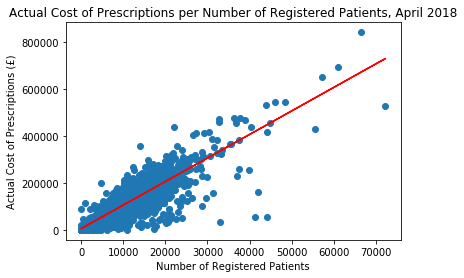

In [441]:
# examine monthly cost per patient as a scatterplot:
cpp1 = plt.figure()
cpp2 = cpp1.add_subplot(111)
x = gp_demographics['num_pts']
y = gp_demographics['act_cost']
cpp2.scatter(x, y)
fit = np.polyfit(x, y, deg=1)
cpp2.plot(x, fit[0] * x + fit[1], color='red')
cpp2.set_title('Actual Cost of Prescriptions per Number of Registered Patients, April 2018')
cpp2.set_xlabel('Number of Registered Patients')
cpp2.set_ylabel('Actual Cost of Prescriptions (£)')

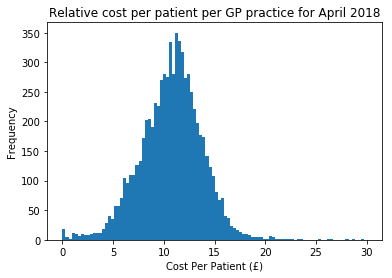

In [442]:
# show relative costs per patient per practice:

cpp3 = plt.hist(gp_demographics['cost_pp'], bins=100, range=(0,30))
plt.title('Relative cost per patient per GP practice for April 2018')
plt.xlabel('Cost Per Patient (£)')
plt.ylabel('Frequency')
plt.show()

In [443]:
# calculate mean and standard deviation of distribution:


print(mu)

11.606269552840821


In [444]:

print(sigma)

38.868941180231104


In [445]:
from scipy.stats import norm
import matplotlib.mlab as mlab

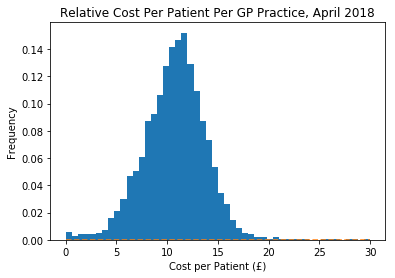

In [446]:
mu = gp_demographics['cost_pp'].mean()
sigma = gp_demographics['cost_pp'].std()
(mu, sigma) = norm.fit(x)
x = gp_demographics['cost_pp']
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, range=(0,30), density=1)
y = scipy.stats.norm.pdf(bins, mu, sigma)
l = ax.plot(bins, y, '--')

ax.set_xlabel('Cost per Patient (£)')
ax.set_ylabel('Frequency')
ax.set_title('Relative Cost Per Patient Per GP Practice, April 2018')
plt.show()

Section B:

This section examines mortality data generated by the World Health Organisation and encoded using the International Classification of Diseases (10) ontology.

The first question examines population level data and total number of deaths for Iceland, Italy and New Zealand.

In [487]:
# import additional libraries to deal with .zip files:

import requests
import io
import zipfile

In [480]:
#import country names and codes:
r = requests.get('https://www.who.int/healthinfo/statistics/country_codes.zip')

In [481]:
with open('country_codes.zip', 'wb') as code:
    code.write(r.content)

In [486]:
cc = pd.read_csv('country_codes.zip')
col_names = ['country', 'name']
cc.columns = col_names
cc.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [488]:
# Mortality data:

r = requests.get('https://www.who.int/healthinfo/statistics/Morticd10_part1.zip')

with open('Morticd10_part1.zip', 'wb') as code:
    code.write(r.content)

mort1 = pd.read_csv('Morticd10_part1.zip', low_memory=False)
mort1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [489]:
# Mortality Data:

r = requests.get('https://www.who.int/healthinfo/statistics/Morticd10_part2.zip')

with open('Morticd10_part2.zip', 'wb') as code:
    code.write(r.content)

mort2 = pd.read_csv('Morticd10_part2.zip', low_memory=False)
mort2.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,7,8,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,7,8,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,7,8,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,7,8,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [490]:
# Population Data:


r = requests.get('https://www.who.int/healthinfo/Pop.zip')

with open('Pop.zip', 'wb') as code:
    code.write(r.content)

pop = pd.read_csv('Pop.zip', low_memory=False)
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [491]:
# Country codes for Iceland, Italy and New Zealand:
iceland = cc.loc[cc['name'].str.match('Iceland')]
print(iceland) # 4160

italy = cc.loc[cc['name'].str.match('Italy')]
print(italy) # 4180

new_zealand = cc.loc[cc['name'].str.match('New Zealand')]
print(new_zealand) # 5150


     country     name
174     4160  Iceland
     country   name
176     4180  Italy
     country         name
218     5150  New Zealand


In [492]:
# Total number of deaths, all cause, all ages for Iceland in 2010:
# Where Cause == 'AAA' (all cause) and Deaths 1 (all ages)
    # Male = 1064
    # Female = 955
    # Total = 2019

# Filter for Iceland:

mort1 = mort1.astype({'Country': str, 'Year': str})

iceland = mort1.loc[mort1['Country'].str.match('4160')]
iceland.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1049428,4160,NaN,NaN,1996,104,A09,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049429,4160,NaN,NaN,1996,104,A09,2,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1049430,4160,NaN,NaN,1996,104,A390,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049431,4160,NaN,NaN,1996,104,A419,1,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049432,4160,NaN,NaN,1996,104,A419,2,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [493]:
# Filter for year 2010:

iceland = iceland.loc[mort1['Year'].str.match('2010')]

iceland.head() # No values therefore 2010 records in second df


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4


In [494]:
# Try mort2 df:

mort2 = mort2.astype({'Country': str, 'Year': str})

iceland = mort2.loc[mort2['Country'].str.match('4160') & mort2['Year'].str.match('2010') & mort2['Cause'].str.match('AAA')]

iceland['Deaths1'].sum()

iceland.head()


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
148777,4160,NaN,NaN,2010,103,AAA,1,0,1,1064,...,158.0,199.0,185.0,113.0,29.0,0.0,3.0,0.0,0.0,2.0
148778,4160,NaN,NaN,2010,103,AAA,2,0,1,955,...,115.0,168.0,210.0,148.0,73.0,0.0,1.0,1.0,1.0,3.0


In [495]:
# Population of Iceland in 2010:
    # Male = 159,971.0
    # Female = 158,070.0
    # Total = 318,041.0

pop = pop.astype({'Country': str, 'Year': str})

iceland_pop = pop.loc[pop['Country'].str.match('4160')]
iceland_pop.head()

iceland_pop2010 = iceland_pop.loc[iceland_pop['Year'].str.match('2010')]
iceland_pop2010.head()
total = iceland_pop2010['Pop1'].sum()
print(total)


318041.0


In [496]:
# Repeat for Italy:

# Population of Italy in 2010:
    # Male = 29,350,339
    # Female = 31,133,047
    # Total = 60,483,386

italy_pop = pop.loc[pop['Country'].str.match('4180')]
italy_pop.head()

italy_pop2010 = italy_pop.loc[italy_pop['Year'].str.match('2010')]
italy_pop2010.head()

total = italy_pop2010['Pop1'].sum()
print(total)


60483386.0


In [497]:
# Total number of deaths, all cause, all ages for Italy in 2010:
# Where Cause == 1000 (all cause) and Deaths 1 (all ages)
    # Male = 285,068
    # Female = 299,547
    # Total = 584,615

italy = mort2.loc[mort2['Country'].str.match('4180') & mort2['Year'].str.match('2010') & mort2['Cause'].str.match('AAA')]
italy.head()

italy['Deaths1'].sum()

584615

In [498]:
# Repeat for New Zealand:


# Population of New Zealand in 2010:
    # Male = 2,144,390
    # Female = 2,222,970
    # Total = 4,367,360

nz_pop = pop.loc[pop['Country'].str.match('5150')]
nz_pop.head()

nz_pop2010 = nz_pop.loc[nz_pop['Year'].str.match('2010')]
nz_pop2010.head()

total = nz_pop2010['Pop1'].sum()
print(total)

4367360.0


In [499]:
# Total number of deaths, all cause, all ages for New Zealand in 2010:
# Where Cause == 1000 (all cause) and Deaths 1 (all ages)
    # Male = 14,344
    # Female = 14,305
    # Total = 28,649

nz = mort2.loc[mort2['Country'].str.match('5150') & mort2['Year'].str.match('2010') & mort2['Cause'].str.match('AAA')]
nz.head()

nz['Deaths1'].sum()

28649

In [500]:
# Display the distribution of deaths (all causes, all years) by age group in Italy:

italy.head()

# Distribution of deaths = columns 'Deaths2:Deaths25'

deaths = italy[['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25' ]].copy()


deaths.loc['sum'] = deaths.sum()
deaths.shape
deaths = deaths.drop([1675495], axis=0)
deaths = deaths.drop([1675496], axis=0)
cols = ['0','1','2','3','4','5-9','10-14','15-19','20-24', '25-29','30-34','35-39','40-44','45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
deaths.columns = cols

deaths.head(24)

,0,1,2,3,4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+
sum,1863.0,124.0,79.0,79.0,61.0,228.0,292.0,821.0,1165.0,1401.0,...,11141.0,15898.0,25616.0,33797.0,53812.0,79178.0,111517.0,123715.0,63707.0,41893.0


In [501]:
# Change the dataframe from wide to long:

df = pd.melt(deaths)
df.head(30)


,variable,value
0,0,1863.0
1,1,124.0
2,2,79.0
3,3,79.0
4,4,61.0
5,5-9,228.0
6,10-14,292.0
7,15-19,821.0
8,20-24,1165.0
9,25-29,1401.0


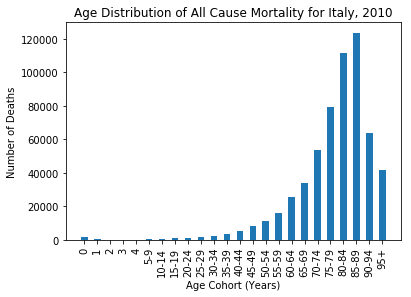

In [503]:
dist = plt.bar(df['variable'], df['value'], width = 0.5), plt.xticks(rotation=90), plt.title('Age Distribution of All Cause Mortality for Italy, 2010'), plt.xlabel('Age Cohort (Years)'), plt.ylabel('Number of Deaths')

In [268]:
# Define the top 5 causes of death (according to ICD10 code), in Italy, across all years, for Neoplasm C00-D48, which is coded as 1026:
    # Generate table with cause of death, number of deaths, proportion of overall deaths.
    # Generate pie chart for proportion of deaths

In [504]:
mort2 = mort2.astype({'Country': str, 'Year': str, 'Cause': str})

mort2.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,7,8,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,7,8,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,7,8,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,7,8,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [505]:
# subset for year 2010:

yr2010 = mort2.loc[mort2['Year'].str.match('2010')]
yr2010.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
995,1400,NaN,NaN,2010,101,1000,1,7,1,363,...,108.0,NaN,NaN,NaN,NaN,0.0,2.0,3.0,3.0,4.0
996,1400,NaN,NaN,2010,101,1000,2,7,1,301,...,169.0,NaN,NaN,NaN,NaN,0.0,2.0,6.0,1.0,0.0
997,1400,NaN,NaN,2010,101,1001,1,7,1,23,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
998,1400,NaN,NaN,2010,101,1001,2,7,1,29,...,19.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
999,1400,NaN,NaN,2010,101,1002,1,7,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [506]:
# subset for country Italy:

italy = yr2010.loc[yr2010['Country'].str.match('4180')]
italy.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1675365,4180,NaN,NaN,2010,104,A010,1,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1675366,4180,NaN,NaN,2010,104,A020,1,0,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1675367,4180,NaN,NaN,2010,104,A020,2,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675368,4180,NaN,NaN,2010,104,A021,1,0,1,6,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1675369,4180,NaN,NaN,2010,104,A021,2,0,1,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [507]:
# subset by neoplasm subtype:

Ca_mouth = italy.loc[italy['Cause'].str.contains('C000') | italy['Cause'].str.contains('C001') | italy['Cause'].str.contains('C002') | italy['Cause'].str.contains('C003') | italy['Cause'].str.contains('C004') | italy['Cause'].str.contains('C005') | italy['Cause'].str.contains('C006') | italy['Cause'].str.contains('C007') | italy['Cause'].str.contains('C008') | italy['Cause'].str.contains('C009') | italy['Cause'].str.contains('C100') | italy['Cause'].str.contains('C110') | italy['Cause'].str.contains('C120') | italy['Cause'].str.contains('C130') | italy['Cause'].str.contains('C140')]


In [508]:
Ca_mouth.shape
Ca_mouth.head(7)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1675657,4180,NaN,NaN,2010,104,C000,1,0,1,3,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675658,4180,NaN,NaN,2010,104,C000,2,0,1,4,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1675659,4180,NaN,NaN,2010,104,C001,1,0,1,17,...,3.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1675660,4180,NaN,NaN,2010,104,C001,2,0,1,10,...,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675661,4180,NaN,NaN,2010,104,C006,1,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675662,4180,NaN,NaN,2010,104,C009,1,0,1,18,...,3.0,4.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1675663,4180,NaN,NaN,2010,104,C009,2,0,1,13,...,5.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [509]:
Ca_mouth['Deaths1'].sum()

340

In [511]:
Ca_oesophagus = italy.loc[italy['Cause'].str.contains('C15')]
Ca_oesophagus.shape
Ca_oesophagus.head()

Ca_oesophagus['Deaths1'].sum()


1871

In [510]:
Ca_stomach = italy.loc[italy['Cause'].str.contains('C16')]
Ca_stomach.shape
Ca_stomach['Deaths1'].sum()

10075

In [512]:
Ca_colon = italy.loc[italy['Cause'].str.contains('C18') | italy['Cause'].str.contains('C19') | italy['Cause'].str.contains('C20') | italy['Cause'].str.contains('C21')]
Ca_colon.shape
Ca_colon['Deaths1'].sum()

18863

In [513]:
Ca_liver = italy.loc[italy['Cause'].str.contains('C22')]
Ca_liver['Deaths1'].sum()

9419

In [514]:
Ca_pancreas = italy.loc[italy['Cause'].str.contains('C25')]
Ca_pancreas['Deaths1'].sum()

10512

In [515]:
Ca_larynx = italy.loc[italy['Cause'].str.contains('C32')]
Ca_larynx['Deaths1'].sum()

1710

In [517]:
Ca_lung = italy.loc[italy['Cause'].str.contains('C33') | italy['Cause'].str.contains('C34')]
Ca_lung['Deaths1'].sum()

33734

In [518]:
Ca_skin = italy.loc[italy['Cause'].str.contains('C43')]
Ca_skin['Deaths1'].sum()

1773

In [519]:
Ca_breast = italy.loc[italy['Cause'].str.contains('C50')]
Ca_breast['Deaths1'].sum()

12238

In [520]:
Ca_cervix = italy.loc[italy['Cause'].str.contains('C53')]
Ca_cervix['Deaths1'].sum()

399

In [521]:
Ca_uterus = italy.loc[italy['Cause'].str.contains('C54') | italy['Cause'].str.contains('C55')]
Ca_uterus['Deaths1'].sum()

2425

In [522]:
Ca_ovary = italy.loc[italy['Cause'].str.contains('C56')]
Ca_ovary['Deaths1'].sum()

3193

In [523]:
Ca_prostate = italy.loc[italy['Cause'].str.contains('C61')]
Ca_prostate['Deaths1'].sum()

7509

In [524]:
Ca_bladder = italy.loc[italy['Cause'].str.contains('C67')]
Ca_bladder['Deaths1'].sum()

5701

In [525]:
Ca_cns = italy.loc[italy['Cause'].str.contains('C70') | italy['Cause'].str.contains('C71') | italy['Cause'].str.contains('C72')]
Ca_cns['Deaths1'].sum()

3735

In [526]:
Ca_nhl = italy.loc[italy['Cause'].str.contains('C82') | italy['Cause'].str.contains('C83') | italy['Cause'].str.contains('C84') | italy['Cause'].str.contains('C85')]
Ca_nhl['Deaths1'].sum()

4549

In [527]:
Ca_mm = italy.loc[italy['Cause'].str.contains('C90')]
Ca_mm['Deaths1'].sum()

2984

In [528]:
Ca_leu = italy.loc[italy['Cause'].str.contains('C91') | italy['Cause'].str.contains('C92') | italy['Cause'].str.contains('C93') | italy['Cause'].str.contains('C94') | italy['Cause'].str.contains('C95')]
Ca_leu['Deaths1'].sum()

5848

In [529]:
Ca_other_mal = italy.loc[italy['Cause'].str.contains('C17') | italy['Cause'].str.contains('C23') | italy['Cause'].str.contains('C24') | italy['Cause'].str.contains('C26') | italy['Cause'].str.contains('C27') | italy['Cause'].str.contains('C28') | italy['Cause'].str.contains('C29') | italy['Cause'].str.contains('C30') | italy['Cause'].str.contains('C31') | italy['Cause'].str.contains('C37') | italy['Cause'].str.contains('C38') | italy['Cause'].str.contains('C39') | italy['Cause'].str.contains('C40') | italy['Cause'].str.contains('C41') | italy['Cause'].str.contains('C44') | italy['Cause'].str.contains('C45') | italy['Cause'].str.contains('C46') | italy['Cause'].str.contains('C47') | italy['Cause'].str.contains('C48') | italy['Cause'].str.contains('C49') | italy['Cause'].str.contains('C51') | italy['Cause'].str.contains('C52') | italy['Cause'].str.contains('C57') | italy['Cause'].str.contains('C58') | italy['Cause'].str.contains('C59') | italy['Cause'].str.contains('C60') | italy['Cause'].str.contains('C62') | italy['Cause'].str.contains('C63') | italy['Cause'].str.contains('C64') | italy['Cause'].str.contains('C65') | italy['Cause'].str.contains('C66') | italy['Cause'].str.contains('C68') | italy['Cause'].str.contains('C69') | italy['Cause'].str.contains('C73') | italy['Cause'].str.contains('C74') | italy['Cause'].str.contains('C75') | italy['Cause'].str.contains('C76') | italy['Cause'].str.contains('C77') | italy['Cause'].str.contains('C78') | italy['Cause'].str.contains('C79') | italy['Cause'].str.contains('C80') | italy['Cause'].str.contains('C81') | italy['Cause'].str.contains('C88') | italy['Cause'].str.contains('C96') | italy['Cause'].str.contains('C97')]
Ca_other_mal['Deaths1'].sum()

27970

In [530]:
Ca_other_ben = italy.loc[italy['Cause'].str.contains('D00') | italy['Cause'].str.contains('D01') | italy['Cause'].str.contains('D02') | italy['Cause'].str.contains('D03') | italy['Cause'].str.contains('D04') | italy['Cause'].str.contains('D05') | italy['Cause'].str.contains('D06') | italy['Cause'].str.contains('D07') | italy['Cause'].str.contains('D08') | italy['Cause'].str.contains('D09') | italy['Cause'].str.contains('D10') | italy['Cause'].str.contains('D11') | italy['Cause'].str.contains('D12') | italy['Cause'].str.contains('D13') | italy['Cause'].str.contains('D14') | italy['Cause'].str.contains('D15') | italy['Cause'].str.contains('D16') | italy['Cause'].str.contains('D17') | italy['Cause'].str.contains('D18') | italy['Cause'].str.contains('D19') | italy['Cause'].str.contains('D20') | italy['Cause'].str.contains('D21') | italy['Cause'].str.contains('D22') | italy['Cause'].str.contains('D23') | italy['Cause'].str.contains('D24') | italy['Cause'].str.contains('D25') | italy['Cause'].str.contains('D26') | italy['Cause'].str.contains('D27') | italy['Cause'].str.contains('D28') | italy['Cause'].str.contains('D29') | italy['Cause'].str.contains('D30') | italy['Cause'].str.contains('D31') | italy['Cause'].str.contains('D32') | italy['Cause'].str.contains('D33') | italy['Cause'].str.contains('D34') | italy['Cause'].str.contains('D35') | italy['Cause'].str.contains('D36') | italy['Cause'].str.contains('D37') | italy['Cause'].str.contains('D38') | italy['Cause'].str.contains('D39') | italy['Cause'].str.contains('D40') | italy['Cause'].str.contains('D41') | italy['Cause'].str.contains('D42') | italy['Cause'].str.contains('D43') | italy['Cause'].str.contains('D44')]

Ca_other_ben['Deaths1'].sum()

4784

In [531]:
# Combined neoplasm death data:

x = np.array(['Ca_mouth', 'Ca_oesophagus', 'Ca_stomach', 'Ca_colon', 'Ca_liver', 'Ca_pancreas', 'Ca_larynx', 'Ca_lung', 'Ca_skin', 'Ca_breast', 'Ca_cervix', 'Ca_uterus', 'Ca_ovary', 'Ca_prostate', 'Ca_bladder', 'Ca_cns', 'Ca_nhl', 'Ca_mm', 'Ca_leu', 'Ca_other_mal', 'Ca_other_ben'])
y = np.array([340, 1871, 10075, 18863, 9419, 10512, 1710, 33734, 1773, 12238, 399, 2425, 3193, 7509, 5701, 3735, 4549, 2984, 5848, 27970, 4784])



z = pd.DataFrame({'Neoplasm': x, 'Deaths': y})
z

,Neoplasm,Deaths
0,Ca_mouth,340
1,Ca_oesophagus,1871
2,Ca_stomach,10075
3,Ca_colon,18863
4,Ca_liver,9419
5,Ca_pancreas,10512
6,Ca_larynx,1710
7,Ca_lung,33734
8,Ca_skin,1773
9,Ca_breast,12238


In [532]:
# Total all cause deaths in Italy in 2010: 584615
z['Deaths'].sum()

169632

In [533]:
# proportion of cancer deaths compared with total population cancer deaths.

z['Prop_Cancer'] = (z['Deaths'] / 169632)*100

z['Prop_Total'] = (z['Deaths'] / 584615)*100

z.head()

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
0,Ca_mouth,340,0.200434,0.058158
1,Ca_oesophagus,1871,1.102976,0.320040
2,Ca_stomach,10075,5.939327,1.723356
3,Ca_colon,18863,11.119954,3.226568
4,Ca_liver,9419,5.552608,1.611146


In [534]:
z.sort_values(by='Deaths', axis=0, ascending=False).head()

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
7,Ca_lung,33734,19.886578,5.770293
19,Ca_other_mal,27970,16.488634,4.784345
3,Ca_colon,18863,11.119954,3.226568
9,Ca_breast,12238,7.214441,2.093343
5,Ca_pancreas,10512,6.196944,1.798106


In [535]:
# Therefore the top 5 causes of death across the category of neoplasm for Italy in 2010 were lung cancer, 'other' categorised malignant cancers, colon cancer, breast cancer and pancreatic cancer.

# transform into a pie chart:
z = z.astype({'Deaths': int})

([<matplotlib.patches.Wedge at 0x1de8ac177f0>,
 [Text(-0.00692645,1.09998,'Ca_mouth'),
  Text(-0.0519498,1.09877,'Ca_oesophagus'),
  Text(-0.291798,1.06059,'Ca_stomach'),
  Text(-0.79247,0.762884,'Ca_colon'),
  Text(-1.06779,0.264244,'Ca_liver'),
  Text(-1.09121,-0.138811,'Ca_pancreas'),
  Text(-1.03222,-0.380163,'Ca_larynx'),
  Text(-0.585694,-0.931109,'Ca_lung'),
  Text(0.105548,-1.09492,'Ca_skin'),
  Text(0.382953,-1.03119,'Ca_breast'),
  Text(0.611652,-0.914266,'Ca_cervix'),
  Text(0.658611,-0.88104,'Ca_uterus'),
  Text(0.746552,-0.807874,'Ca_ovary'),
  Text(0.891012,-0.645056,'Ca_prostate'),
  Text(1.02072,-0.41003,'Ca_bladder'),
  Text(1.07647,-0.226315,'Ca_cns'),
  Text(1.09841,-0.0591522,'Ca_nhl'),
  Text(1.09596,0.0941665,'Ca_mm'),
  Text(1.066,0.271377,'Ca_leu'),
  Text(0.704598,0.844714,'Ca_other_mal'),
  Text(0.0973324,1.09569,'Ca_other_ben')])

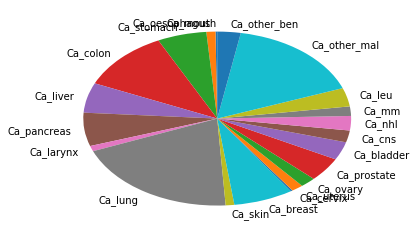

In [307]:
pielabels = 'Ca_mouth', 'Ca_oesophagus', 'Ca_stomach', 'Ca_colon', 'Ca_liver', 'Ca_pancreas', 'Ca_larynx', 'Ca_lung', 'Ca_skin', 'Ca_breast', 'Ca_cervix', 'Ca_uterus', 'Ca_ovary', 'Ca_prostate', 'Ca_bladder', 'Ca_cns', 'Ca_nhl', 'Ca_mm', 'Ca_leu', 'Ca_other_mal', 'Ca_other_ben'

proportion = [340, 1871, 10075, 18863, 9419, 10512, 1710, 33734, 1773, 12238, 399, 2425, 3193, 7509, 5701, 3735, 4549, 2984, 5848, 27970, 4784]

plt.pie(proportion, labels=pielabels, startangle=90)

The next question examines whether neoplastic-related deaths in Australia in 2010 vary according to differences in age group.

The top five age groups with the highest numbers of neoplastic deaths are detailed below.  

In [536]:
# Extract data for Australia, population code 5020:

pop = pop.astype({'Country': str, 'Year': str})

aus_pop = pop.loc[pop['Country'].str.match('5020')]
aus_pop.head()

aus_pop2010 = aus_pop.loc[aus_pop['Year'].str.match('2010')]
aus_pop2010.head()
total = aus_pop2010['Pop1'].sum()
print(total)

22297515.0


In 2010, Australia's population was 22,297,515.  This was composed of 11,100,244 men and 11,197,271 women.

In [537]:
# extract mortality data for australia in 2010:

aus = yr2010.loc[yr2010['Country'].str.match('5020')]
aus.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2259163,5020,NaN,NaN,2010,104,A020,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259164,5020,NaN,NaN,2010,104,A020,2,0,1,4,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2259165,5020,NaN,NaN,2010,104,A021,1,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2259166,5020,NaN,NaN,2010,104,A021,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259167,5020,NaN,NaN,2010,104,A047,1,0,1,16,...,3.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
# Extract data for all types of neoplasm, by ICD code:


aus_neo = aus.loc[aus['Cause'].str.contains('C') | aus['Cause'].str.contains('D00') | aus['Cause'].str.contains('D01') | aus['Cause'].str.contains('D02') | aus['Cause'].str.contains('D03') | aus['Cause'].str.contains('D04') | aus['Cause'].str.contains('D05') | aus['Cause'].str.contains('D06') | aus['Cause'].str.contains('D07') | aus['Cause'].str.contains('D08') | aus['Cause'].str.contains('D09') | aus['Cause'].str.contains('D10') | aus['Cause'].str.contains('D11') | aus['Cause'].str.contains('D12') | aus['Cause'].str.contains('D13') | aus['Cause'].str.contains('D14') | aus['Cause'].str.contains('D15') | aus['Cause'].str.contains('D16') | aus['Cause'].str.contains('D17') | aus['Cause'].str.contains('D18') | aus['Cause'].str.contains('D19') | aus['Cause'].str.contains('D20') | aus['Cause'].str.contains('D21') | aus['Cause'].str.contains('D22') | aus['Cause'].str.contains('D23') | aus['Cause'].str.contains('D24') | aus['Cause'].str.contains('D25') | aus['Cause'].str.contains('D26') | aus['Cause'].str.contains('D27') | aus['Cause'].str.contains('D28') | aus['Cause'].str.contains('D29') | aus['Cause'].str.contains('D30') | aus['Cause'].str.contains('D31') | aus['Cause'].str.contains('D32') | aus['Cause'].str.contains('D33') | aus['Cause'].str.contains('D34') | aus['Cause'].str.contains('D35') | aus['Cause'].str.contains('D36') | aus['Cause'].str.contains('D37') | aus['Cause'].str.contains('D38') | aus['Cause'].str.contains('D39') | aus['Cause'].str.contains('D40') | aus['Cause'].str.contains('D41') | aus['Cause'].str.contains('D42') | aus['Cause'].str.contains('D43') | aus['Cause'].str.contains('D44')].copy()

In [539]:
# Add a row for totals of all age group deaths:

aus_neo.loc['Total'] = aus_neo.sum()

aus_neo.tail()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2259894,5020,NaN,NaN,2010,104,D444,2,0,1,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259895,5020,NaN,NaN,2010,104,D445,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259896,5020,NaN,NaN,2010,104,D445,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259897,5020,NaN,NaN,2010,104,D447,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,5020502050205020502050205020502050205020502050...,0.0,0,2010201020102010201020102010201020102010201020...,1041041041041041041041041041041041041041041041...,C001C001C009C009C01C01C020C028C029C029C030C030...,801,0,539,42750,...,6205.0,7058.0,5374.0,2258.0,698.0,2.0,1.0,2.0,0.0,8.0


In [540]:
# Select the age group columns of interest:


aus_neo1 = aus_neo[['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25' ]].copy()

cols = ['0','1','2','3','4','5-9','10-14','15-19','20-24', '25-29','30-34','35-39','40-44','45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
aus_neo1.columns = cols

aus_neo1.shape
aus_neo1.tail()

,0,1,2,3,4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+
2259894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2259895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2259896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,11.0,7.0,11.0,7.0,8.0,45.0,31.0,50.0,52.0,96.0,...,1749.0,2687.0,3923.0,4741.0,5672.0,6205.0,7058.0,5374.0,2258.0,698.0


In [541]:
# Drop unnecessary rows and melt to a long format:


aus_neo1 = aus_neo1.drop(aus_neo.index[0:539])

aus_neo2 = pd.melt(aus_neo1)

aus_neo2.head(20)

,variable,value
0,0,11.0
1,1,7.0
2,2,11.0
3,3,7.0
4,4,8.0
5,5-9,45.0
6,10-14,31.0
7,15-19,50.0
8,20-24,52.0
9,25-29,96.0


In [542]:
# Sort this table to show the top five age groups for neoplastic deaths:

aus_neo2.sort_values(by='value', ascending=False)

,variable,value
20,80-84,7058.0
19,75-79,6205.0
18,70-74,5672.0
21,85-89,5374.0
17,65-69,4741.0
16,60-64,3923.0
15,55-59,2687.0
22,90-94,2258.0
14,50-54,1749.0
13,45-49,1058.0


Therefore the top five age groups for neoplastics deaths in Australia during 2010 were 80-84, 75-79, 70-74, 85-89, 65-69.  These numbers do not reflect the proportion of deaths by age group and as such may be indicative of the varying magnitude of the age strata.

To facilitate comparison of specific cancer mortality between Australia and Italy, cancer-specific data is extracted by the same method:

In [543]:
Ca_mouth = aus.loc[aus['Cause'].str.contains('C000') | aus['Cause'].str.contains('C001') | aus['Cause'].str.contains('C002') | aus['Cause'].str.contains('C003') | aus['Cause'].str.contains('C004') | aus['Cause'].str.contains('C005') | aus['Cause'].str.contains('C006') | aus['Cause'].str.contains('C007') | aus['Cause'].str.contains('C008') | aus['Cause'].str.contains('C009') | aus['Cause'].str.contains('C100') | aus['Cause'].str.contains('C110') | aus['Cause'].str.contains('C120') | aus['Cause'].str.contains('C130') | aus['Cause'].str.contains('C140')].copy()

Ca_mouth.loc['Totals'] = Ca_mouth.sum(axis=0)
Ca_mouth['Deaths1'].sum()

Ca_oesophagus = aus.loc[aus['Cause'].str.contains('C15')]
Ca_oesophagus.shape
Ca_oesophagus['Deaths1'].sum()

Ca_stomach = aus.loc[aus['Cause'].str.contains('C16')]
Ca_stomach.shape
Ca_stomach['Deaths1'].sum()

Ca_colon = aus.loc[aus['Cause'].str.contains('C18') | aus['Cause'].str.contains('C19') | aus['Cause'].str.contains('C20') | aus['Cause'].str.contains('C21')]
Ca_colon.shape
Ca_colon['Deaths1'].sum()

Ca_liver = aus.loc[aus['Cause'].str.contains('C22')]
Ca_liver['Deaths1'].sum()

Ca_pancreas = aus.loc[aus['Cause'].str.contains('C25')]
Ca_pancreas['Deaths1'].sum()

Ca_larynx = aus.loc[aus['Cause'].str.contains('C32')]
Ca_larynx['Deaths1'].sum()

Ca_lung = aus.loc[aus['Cause'].str.contains('C33') | aus['Cause'].str.contains('C34')]
Ca_lung['Deaths1'].sum()

Ca_skin = aus.loc[aus['Cause'].str.contains('C43')]
Ca_skin['Deaths1'].sum()

Ca_breast = aus.loc[aus['Cause'].str.contains('C50')]
Ca_breast['Deaths1'].sum()

Ca_cervix = aus.loc[aus['Cause'].str.contains('C53')]
Ca_cervix['Deaths1'].sum()

Ca_uterus = aus.loc[aus['Cause'].str.contains('C54') | aus['Cause'].str.contains('C55')]
Ca_uterus['Deaths1'].sum()

Ca_ovary = aus.loc[aus['Cause'].str.contains('C56')]
Ca_ovary['Deaths1'].sum()

Ca_prostate = aus.loc[aus['Cause'].str.contains('C61')]
Ca_prostate['Deaths1'].sum()

Ca_bladder = aus.loc[aus['Cause'].str.contains('C67')]
Ca_bladder['Deaths1'].sum()

Ca_cns = aus.loc[aus['Cause'].str.contains('C70') | aus['Cause'].str.contains('C71') | aus['Cause'].str.contains('C72')]
Ca_cns['Deaths1'].sum()

Ca_nhl = aus.loc[aus['Cause'].str.contains('C82') | aus['Cause'].str.contains('C83') | aus['Cause'].str.contains('C84') | aus['Cause'].str.contains('C85')]
Ca_nhl['Deaths1'].sum()

Ca_mm = aus.loc[aus['Cause'].str.contains('C90')]
Ca_mm['Deaths1'].sum()

Ca_leu = aus.loc[aus['Cause'].str.contains('C91') | aus['Cause'].str.contains('C92') | aus['Cause'].str.contains('C93') | aus['Cause'].str.contains('C94') | aus['Cause'].str.contains('C95')]
Ca_leu['Deaths1'].sum()

Ca_other_mal = aus.loc[aus['Cause'].str.contains('C17') | aus['Cause'].str.contains('C23') | aus['Cause'].str.contains('C24') | aus['Cause'].str.contains('C26') | aus['Cause'].str.contains('C27') | aus['Cause'].str.contains('C28') | aus['Cause'].str.contains('C29') | aus['Cause'].str.contains('C30') | aus['Cause'].str.contains('C31') | aus['Cause'].str.contains('C37') | aus['Cause'].str.contains('C38') | aus['Cause'].str.contains('C39') | aus['Cause'].str.contains('C40') | aus['Cause'].str.contains('C41') | aus['Cause'].str.contains('C44') | aus['Cause'].str.contains('C45') | aus['Cause'].str.contains('C46') | aus['Cause'].str.contains('C47') | aus['Cause'].str.contains('C48') | aus['Cause'].str.contains('C49') | aus['Cause'].str.contains('C51') | aus['Cause'].str.contains('C52') | aus['Cause'].str.contains('C57') | aus['Cause'].str.contains('C58') | aus['Cause'].str.contains('C59') | aus['Cause'].str.contains('C60') | aus['Cause'].str.contains('C62') | aus['Cause'].str.contains('C63') | aus['Cause'].str.contains('C64') | aus['Cause'].str.contains('C65') | aus['Cause'].str.contains('C66') | aus['Cause'].str.contains('C68') | aus['Cause'].str.contains('C69') | aus['Cause'].str.contains('C73') | aus['Cause'].str.contains('C74') | aus['Cause'].str.contains('C75') | aus['Cause'].str.contains('C76') | aus['Cause'].str.contains('C77') | aus['Cause'].str.contains('C78') | aus['Cause'].str.contains('C79') | aus['Cause'].str.contains('C80') | aus['Cause'].str.contains('C81') | aus['Cause'].str.contains('C88') | aus['Cause'].str.contains('C96') | aus['Cause'].str.contains('C97')]
Ca_other_mal['Deaths1'].sum()

Ca_other_ben = aus.loc[aus['Cause'].str.contains('D00') | aus['Cause'].str.contains('D01') | aus['Cause'].str.contains('D02') | aus['Cause'].str.contains('D03') | aus['Cause'].str.contains('D04') |  aus['Cause'].str.contains('D05') | aus['Cause'].str.contains('D06') | aus['Cause'].str.contains('D07') | aus['Cause'].str.contains('D08') | aus['Cause'].str.contains('D09') | aus['Cause'].str.contains('D10') | aus['Cause'].str.contains('D11') | aus['Cause'].str.contains('D12') | aus['Cause'].str.contains('D13') | aus['Cause'].str.contains('D14') | aus['Cause'].str.contains('D15') | aus['Cause'].str.contains('D16') | aus['Cause'].str.contains('D17') | aus['Cause'].str.contains('D18') | aus['Cause'].str.contains('D19') | aus['Cause'].str.contains('D20') | aus['Cause'].str.contains('D21') | aus['Cause'].str.contains('D22') | aus['Cause'].str.contains('D23') | aus['Cause'].str.contains('D24') | aus['Cause'].str.contains('D25') | aus['Cause'].str.contains('D26') | aus['Cause'].str.contains('D27') | aus['Cause'].str.contains('D28') | aus['Cause'].str.contains('D29') | aus['Cause'].str.contains('D30') | aus['Cause'].str.contains('D31') | aus['Cause'].str.contains('D32') | aus['Cause'].str.contains('D33') | aus['Cause'].str.contains('D34') | aus['Cause'].str.contains('D35') | aus['Cause'].str.contains('D36') |  aus['Cause'].str.contains('D37') | aus['Cause'].str.contains('D38') | aus['Cause'].str.contains('D39') | aus['Cause'].str.contains('D40') | aus['Cause'].str.contains('D41') | aus['Cause'].str.contains('D42') | aus['Cause'].str.contains('D43') | aus['Cause'].str.contains('D44')]

Ca_other_ben['Deaths1'].sum()


403

In [544]:
# Display in table format:

x1 = np.array(['Ca_mouth', 'Ca_oesophagus', 'Ca_stomach', 'Ca_colon', 'Ca_liver', 'Ca_pancreas', 'Ca_larynx', 'Ca_lung', 'Ca_skin', 'Ca_breast', 'Ca_cervix', 'Ca_uterus', 'Ca_ovary', 'Ca_prostate', 'Ca_bladder', 'Ca_cns', 'Ca_nhl', 'Ca_mm', 'Ca_leu', 'Ca_other_mal', 'Ca_other_ben'])
y1 = np.array([180,1223,1094,4061,1337,2434,255,8102,1452,2866,231,364,912,3236,1031,1270,1340,824,1639,7914,403])
z1 = pd.DataFrame({'Neoplasm': x1, 'Deaths': y1})
z1

,Neoplasm,Deaths
0,Ca_mouth,180
1,Ca_oesophagus,1223
2,Ca_stomach,1094
3,Ca_colon,4061
4,Ca_liver,1337
5,Ca_pancreas,2434
6,Ca_larynx,255
7,Ca_lung,8102
8,Ca_skin,1452
9,Ca_breast,2866


In [545]:
# Add columns for proportions of deaths by specific cancer for all cancer deaths and proportion for total deaths:


z1['Prop_Cancer'] = (z1['Deaths'] / 42748)*100

z1['Prop_Total'] = (z1['Deaths'] / 143473)*100

z1.head()

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
0,Ca_mouth,180,0.421072,0.125459
1,Ca_oesophagus,1223,2.860953,0.852425
2,Ca_stomach,1094,2.559184,0.762513
3,Ca_colon,4061,9.499860,2.830498
4,Ca_liver,1337,3.127632,0.931883


The final section of this report details a comparison on frequency of different neoplastic related deaths for 2010, between Italy and Australia.  

To summarise population data from earlier sections.  In 2010, the population of Italy was 60,483,386.  This was composed of 29,350,339 men (48.5%) and 31,133,047 women (51.5%).  Total all cause deaths in Italy was 584,615, giving a mortality rate of 0.97%.  The proportion of all deaths related to cancer was 29.0%.  

In [546]:
oz = mort2.loc[mort2['Country'].str.match('5020') & mort2['Year'].str.match('2010') & mort2['Cause'].str.match('AAA')]
oz['Deaths1'].sum()

143473

The total Australian population was 22,297,515, composed of 11,100,244 men (49.8%) and 11,197,271 women (50.2%).  Total all cause deaths was 143,473, giving a mortality rate of 0.64%.  The proportion of all deaths related to cancer was 29.8%. 

Comparing the two country's cancer specific death rates reveals some noteable differences.

In [547]:
#Italy:
z

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
0,Ca_mouth,340,0.200434,0.058158
1,Ca_oesophagus,1871,1.102976,0.320040
2,Ca_stomach,10075,5.939327,1.723356
3,Ca_colon,18863,11.119954,3.226568
4,Ca_liver,9419,5.552608,1.611146
5,Ca_pancreas,10512,6.196944,1.798106
6,Ca_larynx,1710,1.008065,0.292500
7,Ca_lung,33734,19.886578,5.770293
8,Ca_skin,1773,1.045204,0.303277
9,Ca_breast,12238,7.214441,2.093343


In [548]:
# Australia:

z1

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
0,Ca_mouth,180,0.421072,0.125459
1,Ca_oesophagus,1223,2.860953,0.852425
2,Ca_stomach,1094,2.559184,0.762513
3,Ca_colon,4061,9.499860,2.830498
4,Ca_liver,1337,3.127632,0.931883
5,Ca_pancreas,2434,5.693834,1.696486
6,Ca_larynx,255,0.596519,0.177734
7,Ca_lung,8102,18.952933,5.647056
8,Ca_skin,1452,3.396650,1.012037
9,Ca_breast,2866,6.704407,1.997588


In [549]:
# Examine the top five specific cancer causes of death for both countries:

#Italy:
z.sort_values(by='Deaths', axis=0, ascending=False).head()

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
7,Ca_lung,33734,19.886578,5.770293
19,Ca_other_mal,27970,16.488634,4.784345
3,Ca_colon,18863,11.119954,3.226568
9,Ca_breast,12238,7.214441,2.093343
5,Ca_pancreas,10512,6.196944,1.798106


In [550]:
# Australia:

z1.sort_values(by='Deaths', axis=0, ascending=False).head()

,Neoplasm,Deaths,Prop_Cancer,Prop_Total
7,Ca_lung,8102,18.952933,5.647056
19,Ca_other_mal,7914,18.513147,5.516020
3,Ca_colon,4061,9.499860,2.830498
13,Ca_prostate,3236,7.569945,2.255477
9,Ca_breast,2866,6.704407,1.997588


As can be seen from the above tables, the leading cause of cancer-related death in both countries is lung cancer.  By reviewing the rest of the top five for both countries we can see that Australia has potentially much higher rates of prostate cancer than Italy, which by contrast has higher rates of pancreatic cancer.  

In seeking to explain this finding of higher prostate cancer rates we should first look back to the population data for both countries.  As described, Australia has a male to female ratio of 49.8:50.2 compared to Italy with a ratio of 48.5:51.5.  Australia has therefore a higher amount of men forming the total population than Italy, which could explain prostate cancer being in their top five list.  

By acknowledging the environmental risk factors which play a significant role in the aetiology of certain types of cancer we can review the data to see if these assertions are supported.  Located deep in the southern hemisphere, around a large area of depleted ozone, the Australian population is at high risk for the development of skin cancers such as melanoma.  This assertion is supported in this data, when compared to Italy, deaths from skin cancer in Australia account for 3.4% of total cancer deaths vs 1.0% in Italy.   

Differences between these two countries for volume of deaths per type of cancer and also proportion of deaths (per overall cancer mortality) can be displayed graphically:

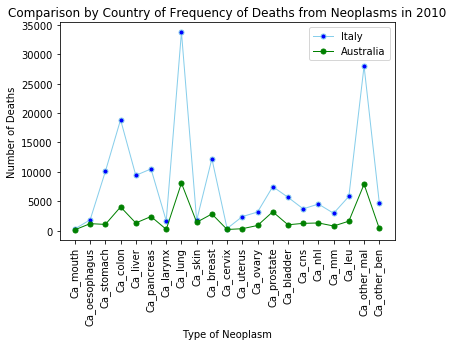

In [551]:
# Combine the results for both Australia and Italy:
merged_deaths = pd.merge(z, z1, how='inner', on='Neoplasm')
merged_deaths.head()

# Plot:
df = pd.DataFrameneoplasm = merged_deaths['Neoplasm']
aus_deaths = merged_deaths['Deaths_y']
italy_deaths = merged_deaths['Deaths_x']

plt.plot( 'Neoplasm', 'Deaths_x', data=merged_deaths, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1, label='Italy' )
plt.plot( 'Neoplasm', 'Deaths_y', data=merged_deaths, marker='o', color='green', markersize=5, linewidth=1, label='Australia')
plt.title('Comparison by Country of Frequency of Deaths from Neoplasms in 2010')
plt.xlabel('Type of Neoplasm')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.legend()

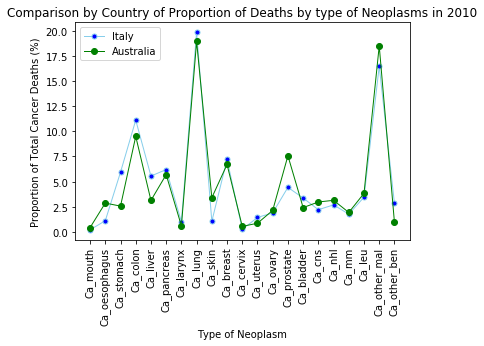

In [552]:
# Plot for proportion of deaths per type of cancer (proportion of total cancer related deaths)

plt.plot( 'Neoplasm', 'Prop_Cancer_x', data=merged_deaths, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1, label='Italy' )
plt.plot( 'Neoplasm', 'Prop_Cancer_y', data=merged_deaths, marker='o', color='green', linewidth=1, label='Australia')
plt.title('Comparison by Country of Proportion of Deaths by type of Neoplasms in 2010')
plt.xlabel('Type of Neoplasm')
plt.ylabel('Proportion of Total Cancer Deaths (%)')
plt.xticks(rotation=90)
plt.legend()

This graph allows us to discern differences in death rates for each type of cancer between the two countries.  We can see death rates for prostate cancer, skin cancer and oesophageal cancer are proportionally higher for Australia than Italy.  These results are likely due to differences in rates of occurrence rather than any difference in efficacy of treatment for these cancers between the two countries.  